# Numnerical Analysis   Homework 3     B063012054

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os 

## problem 1 - The two-point Gauss-Legendre 
### $f_1 (x)=0.2+25x-200x^2+675x^3$
1. change of variable: $x=0.4+0.4x_d$ and $dx=0.4d(x_d)$
2. $\int_{0}^{0.8} f(x) \,dx = \int_{-1}^{1} f(x_d) 0.4 \,dx_d$
3. $\int_{-1}^{1} f(x_d) \,dx_d = f(x_d=\frac{-1}{\sqrt{3}})+f(x_d=\frac{1}{\sqrt{3}}) = 107.9$
4. $\int_{0}^{0.8} f(x) \,dx = 0.4\times \int_{-1}^{1} f(x_d) \,dx_d = 43.15$
5. $\varepsilon_t \approx 0.\ \% $  

The relative error must be zero because the truncation error is 4th-order differential formula and our polynomial is 3rd-order.

In [2]:
ub = 0.8
lb = 0
x = np.linspace(lb,ub,1000)

def obj_func1(x):
    return 0.2 + 25 * x - 200 * x**2 + 675 * x **3

def obj_func2(x):
    return 0.2 + 25 * x - 200 * x **2 + 675 * x**3 - 900 * x**4

def obj_func3(x):
    return 0.2 + 25 * x - 200 * x**2 + 675 * x**3 - 900 * x**4 + 400 * x**5

def true_area1(x):
    return 0.2 * x + 25 * x **2 / 2 - 200 * x**3 / 3 + 675 * x**4 / 4

def true_area2(x):
    return 0.2 * x + 25 * x**2 / 2 - 200 * x**3 / 3 + 675 * x**4 / 4 - 900 * x**5 / 5

def true_area3(x):
    return 0.2 * x + 25 * x**2 / 2 - 200 * x**3 / 3 + 675 * x**4 / 4 - 900 * x**5 / 5 + 400 * x**6 / 6

def err(app_x,func):
    if func == 1:
        t = true_area1(ub) - true_area1(lb)
        e = (t - app_x) / t * 100
        return e
    elif func == 2:
        t = true_area2(ub) - true_area2(lb)
        e = (t - app_x) / t * 100
        return e
    elif func == 3:
        t = true_area3(ub) - true_area3(lb)
        e = (t - app_x) / t * 100
        return e
    else:
        raise ValueError('the second arg must be 1,2 or 3')       

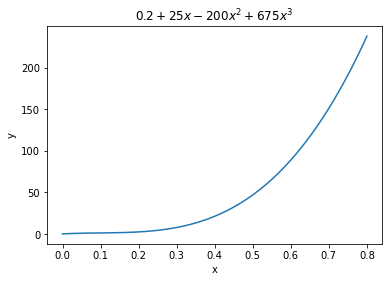

𝑓(𝑥0=0.1691)+𝑓(𝑥1=0.6309) = 107.86666666666673
∫𝑓(𝑥)𝑑𝑥 = 43.1466666666667
𝜀𝑡 = -3.2936158950560875e-14 %


In [3]:
plt.plot(x,obj_func1(x))
plt.title('$0.2+25x-200x^2+675x^3$')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
x0 = 0.4 + 0.4 * (-1 / np.sqrt(3))
x1 = 0.4 + 0.4 * (1 / np.sqrt(3))
f1_x0_x1 = obj_func1(x0) + obj_func1(x1)
area = 0.4 * f1_x0_x1
print('𝑓(𝑥0=0.1691)+𝑓(𝑥1=0.6309) =',f1_x0_x1)
print('∫𝑓(𝑥)𝑑𝑥 =',area)
print(f'𝜀𝑡 = {err(area,1)} %')

---------------------------------------------------------------------------------------------------------------------------

### $f_2 (x)=0.2+25x-200x^2+675x^3-900x^4$
1. change of variable: $x=0.4+0.4x_d$ and $dx=0.4\ d(x_d)$
2. $\int_{0}^{0.8} f(x) \,dx = \int_{-1}^{1} f(x_d) 0.4 \,dx_d$
3. $\int_{-1}^{1} f(x_d) \,dx_d = f(x_d=\frac{-1}{\sqrt{3}})+f(x_d=\frac{1}{\sqrt{3}}) = -35.49$
4. $\int_{0}^{0.8} f(x) \,dx = 0.4\times \int_{-1}^{1} f(x_d) \,dx_d = -14.20$
5. $\varepsilon_t = 10.35\ \% $  

This polynomial is 4th-order, so its truncation error exists.

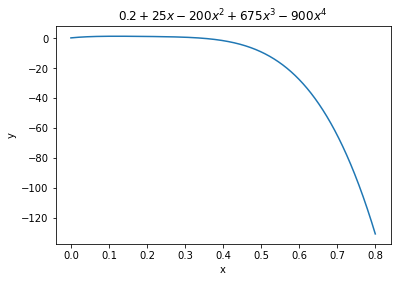

𝑓(𝑥0=0.1691)+𝑓(𝑥1=0.6309) = -35.49333333333337
∫𝑓(𝑥)𝑑𝑥 = -14.197333333333347
𝜀𝑡 = 10.346221204364747 %


In [4]:
plt.plot(x,obj_func2(x))
plt.title('$0.2+25x-200x^2+675x^3-900x^4$')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

f2_x0_x1 = obj_func2(x0) + obj_func2(x1)
area = 0.4 * f2_x0_x1
print('𝑓(𝑥0=0.1691)+𝑓(𝑥1=0.6309) =',f2_x0_x1)
print('∫𝑓(𝑥)𝑑𝑥 =',area)
print(f'𝜀𝑡 = {err(area,2)} %')

#### we can check if the outcome shown on page 51 and ours are equivalent.

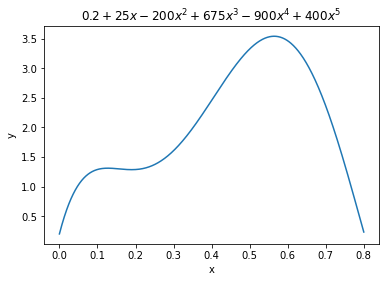

𝑓(𝑥0=0.1691)+𝑓(𝑥1=0.6309) = 4.556765446932765
∫𝑓(𝑥)𝑑𝑥 = 1.822706178773106
𝜀𝑡 = -11.104489115720831 %


In [5]:
plt.plot(x,obj_func3(x))
plt.title('$0.2+25x-200x^2+675x^3-900x^4+400x^5$')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

f3_x0_x1 = obj_func3(0.1691) + obj_func3(0.6309)
area = 0.4 * f3_x0_x1
print('𝑓(𝑥0=0.1691)+𝑓(𝑥1=0.6309) =',f3_x0_x1)
print('∫𝑓(𝑥)𝑑𝑥 =',area)
print(f'𝜀𝑡 = {err(area,3)} %')

They are equivalent!

## problem 2

#### Read Data

In [6]:
def readfiles(arg):
    if arg == 'pcMRI' or arg == 'magMRI':
        path = os.path.join(os.getcwd(),arg)
        dirs = os.listdir(path)
        arr = np.zeros((256,256,51))
        for i, dat in enumerate(dirs):
            files = os.path.join(path,dat)
            with open(files,'r') as f:
                arr[:,:,i] = np.genfromtxt(f)
        return arr
    else:
        raise ValueError('arg must be pcMRI or magMRI')

In [7]:
pc = readfiles('pcMRI')
mag = readfiles('magMRI')

#### problem2-(a)
Open a magMRI file via matlab or Excel to check the significant region.  
Unfortunately it's irregular, so we have to redraw the region as a rectangle.  
The following table shows the most likely region of SSS for magMRI[0], where O represents it.  
NOTE: x-direction is the index of column and y-direction is the index of row.

|   |121|122|123|124|125|126|127|128|
|---|--- | --- | --- |--- | --- | --- |--- | --- |
|218|   |   |   |   | O | O |   |   |
|219|   |   | O | O | O | O |   |   |
|220|   | O | O | O | O | O | O |   |
|221| O | O | O | O | O | O | O | O |
|222|   | O | O | O | O | O | O | O |
|223|   |   |   | O | O | O | O |   |

We define the region of interest is from the 122nd to the 128th column and from the 219th to the 223rd row, where X represents the selected but not interesting pixel and some of them in bold and italic are used to calculation.

|   |121|122|123|124|125|126|127|128|
|---|--- | --- | --- |--- | --- | --- |--- | --- |
|218|   |   |   |   |   |   |   |   |
|219|   | ***X*** | O | O | ***O*** | O | X | ***X*** |
|220|   | O | O | O | O | O | O | X |
|221|   | ***O*** | O | O | ***O*** | O | O | ***O*** |
|222|   | O | O | O | O | O | O | O |
|223|   | ***X*** | X | O | ***O*** | O | O | ***X*** |

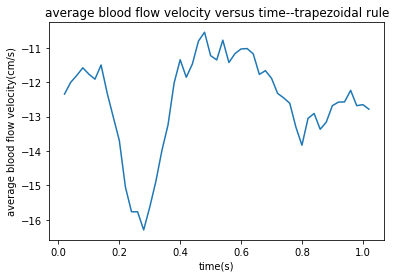

In [8]:
def trap(img):
    v_y1 = 3 * H * (img[Y1,X1] + 2 * img[Y1,X1+3] + img[Y1,X2]) / 2        # unit: cm^2/s
    v_y2 = 3 * H * (img[Y2,X1] + 2 * img[Y2,X1+3] + img[Y2,X2]) / 2        # unit: cm^2/s
    v_y3 = 3 * H * (img[Y1+2,X1] + 2 * img[Y1+2,X1+3] + img[Y1+2,X2]) / 2  # unit: cm^2/s
    v = 2 * H * (v_y1 + 2 * v_y3 + v_y2) / 2                               # unit: cm^3/s
    v_mean = v / ((Y2-Y1) * (X2-X1) * A)                               # unit: cm/s
    return v_mean

X1 = 122 
X2 = 128
Y1 = 219
Y2 = 223
H = 2.2 / 256
T = 1 / 50
A = H**2

avg = np.zeros(51)

for i in range(51):
    avg[i] = trap(pc[:,:,i])
t = np.linspace(1,51,51) / 50
plt.plot(t,avg)
plt.xlabel('time(s)')
plt.ylabel('average blood flow velocity(cm/s)')
plt.title("average blood flow velocity versus time--trapezoidal rule")
plt.show()

#### problem 2-(b)

One cubic centimeter is equal to one milliliter. The unit for its field-of-view is millimeter and that for velocity is centimeter per second.  
Flux is defined as **volumn/second** or **(cross-sectional area)$\times$(average velocity)**.  
Hence, h is $\frac{1}{50} s $   
the distance of a specific pixel between adjacent magMRI is\begin{equation}\int \text{(pixel value of magMRI)}\ dt  \end{equation}and the average velocity \begin{equation} \overline{v} = \frac{distance}{time} \end{equation}.  
  
Finally, \begin{equation} flux = (\frac{2.2\ cm}{256\ pixels})^2\ \frac{\int \text{(pixel value of magMRI)}\ dt}{h\times\text{# of images}} \end{equation}.



In [9]:
def trap_time():
    Flux = np.zeros((51,256,256))  
    for img_num in range(1,51):
        if img_num == 1:
            distance = T * (pc[:,:,0] + pc[:,:,1]) / 2
            velocity = distance / T
            flux = A * velocity
            Flux[img_num] = flux
        else:
            flux = A * T * (pc[:,:,0] + 2 * np.sum(pc[:,:,1:img_num],axis=2) + pc[:,:,img_num]) / 2 / (T * img_num)
            Flux[img_num] = flux
    return Flux


def simpson_time():
    Flux = np.zeros((51,256,256))
    distance = T * (pc[:,:,0] + 4 * pc[:,:,1] + pc[:,:,2]) / 3   # i = 2
    velocity = distance / (2 * T)
    flux = A * velocity
    Flux[2] = flux
    Flux[3] = A * 3 * T * (pc[:,:,0] + 3 * np.sum(pc[:,:,1:3],axis=2) + pc[:,:,3]) / 8 / (3 * T) # i = 3   
    for img_num in range(4,51):  
        if img_num % 2 == 0:     # 若有奇數個點，使用 1/3 simpson
            Even, Odd = get_even_odd(img_num)
            flux = A * T * (pc[:,:,0] + 4 * Odd + 2 * Even + pc[:,:,img_num]) / 3 / (img_num * T)
            Flux[img_num] = flux
        elif img_num % 2 == 1:   # 若有奇數個點，使用 1/3 simpson 與 3/8 simpson
            Even, Odd = get_even_odd(img_num)
            flux = (A * T * (pc[:,:,0] + 4 * Odd + 2 * Even + pc[:,:,img_num-1]) / 3 + \
                   A * 3 * T * (pc[:,:,img_num-1] + 3 * np.sum(pc[:,:,img_num-2:img_num],axis=2) + pc[:,:,img_num]) / 8) \
                   / (img_num * T)
            Flux[img_num] = flux  
    return Flux


def get_even_odd(img_num):
    
    Odd = np.zeros((256,256))           
    Even = np.zeros((256,256))
    
    if img_num % 2 == 0:
        img_num = img_num//2 + 1
    else:
        img_num = img_num//2   
        
    odds = 2 * np.arange(1,img_num) - 1
    for odd in odds:
        Odd = np.sum([Odd,pc[:,:,odd]],axis=0)
        if odd == np.max(odds):
            break
        Even = np.sum([Even,pc[:,:,odd+1]],axis=0)
        
    return Even,Odd

# 由於速度介於正負 40，表正負號為方向性，因此單純用 max 找不到負極值，需要特別考慮到負的像素點
def findextreme(arg):
    if type(arg) is str and arg == 'trap':
        Flux = trap_time()
    elif type(arg) is str and arg == 'simp':
        Flux = simpson_time()
    else:
        Flux = arg 
    max_flux_abs = np.max(np.abs(Flux),axis=0)
    max_flux = np.where(Flux.max(axis=0) == max_flux_abs,Flux.max(axis=0),Flux.min(axis=0))
    max_flux_ind = np.where(Flux.max(axis=0) == max_flux_abs,Flux.argmax(axis=0),Flux.argmin(axis=0))
    mean_flux = Flux[-1]
    
    return max_flux, max_flux_ind, mean_flux
    



# 對於每個像素，其最大流量發生的時間點用 maxind 儲存，值用 maxflux 儲存，平均流量 mean
maxflux_trap, maxind_trap, mean_trap = findextreme('trap')
maxflux_simp, maxind_simp, mean_simp = findextreme('simp')

Show the maximum blood flow rate for each pixel in the SSS region. The result of two methods are similar but a little different.

In [10]:
print('max flow rate (ml/s) derived from trapezoidal rule for each pixel in the SSS region is \n',maxflux_trap[Y1:Y2,X1:X2])
print('============================================================================')
print("max flow rate (ml/s) derived from Simpson's rulefor each pixel in the SSS region is \n",maxflux_simp[Y1:Y2,X1:X2])

max flow rate (ml/s) derived from trapezoidal rule for each pixel in the SSS region is 
 [[-0.00025249 -0.0007956  -0.00110125 -0.00105599 -0.00095327 -0.00074087]
 [-0.00101751 -0.00136    -0.00137964 -0.00116612 -0.00105618 -0.00090441]
 [-0.00149945 -0.00169506 -0.00143276 -0.00135192 -0.00123423 -0.00119344]
 [-0.00117562 -0.00155775 -0.00171786 -0.00170087 -0.00160891 -0.00142152]]
max flow rate (ml/s) derived from Simpson's rulefor each pixel in the SSS region is 
 [[-0.00027287 -0.00079771 -0.00110151 -0.00105517 -0.00095104 -0.00073871]
 [-0.00101541 -0.00136508 -0.00138383 -0.00116314 -0.00105565 -0.00090272]
 [-0.00149823 -0.00169216 -0.00143247 -0.0013503  -0.00123481 -0.00119196]
 [-0.00117211 -0.00156055 -0.00172242 -0.00170271 -0.00160732 -0.00142503]]


#### problem 2-(c)

We can compare the above function with one given from problem (a) and check if they are avaliable.

In [11]:
def plotflux(method):
    if method == 'trap':
        start = 1
        print('trapezoidal rule\n')
        flux = trap_time()     
    elif method == 'simp':
        print("Simposon's rule\n")
        flux = simpson_time()
        start = 2
    else:
        raise ValueError('Input must be either trap or simp')
    ROI = flux[:,Y1:Y2,X1:X2].reshape((51,24))
    for i in range(24): 
            plt.plot(t[start:],ROI[start:,i]) # 透過(b)的結果，畫出SSS區域每個pixel值在每個時間點的通量 
    plt.xlabel('time(s)')
    plt.ylabel('flux(ml/s)')
    plt.title('flux versus time for each pixel in the ROI')
    plt.show()
    plt.plot(t[start:],np.sum(ROI[start:,:],axis=1)/((Y2-Y1)*(X2-X1)*A))  # 透過(b)的結果，畫出SSS區域在每個時間點的平均速度
    plt.xlabel('time(s)')
    plt.ylabel('average velocity(cm/s)')
    plt.title('average velocity versus time in the ROI')
    plt.show()


trapezoidal rule



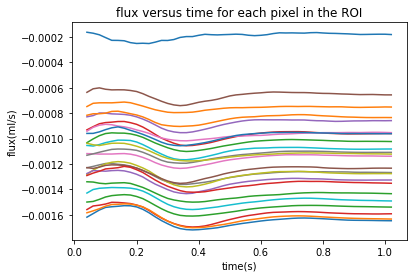

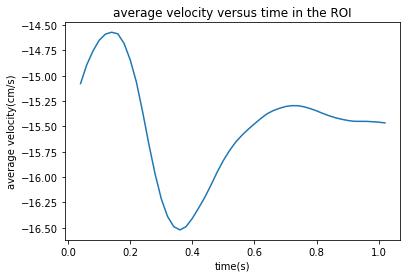

In [12]:
plotflux('trap')

When does the flow rate reach to the maximum for each pixel in the SSS region?

In [13]:
column = ['122nd','123rd','124th','125th','126th','127th']
row = ['219th','220th','221st','222nd']

def SSS_flux_time(maxind):
    time = maxind[Y1:Y2,X1:X2] * T
    table = pd.DataFrame(time,columns=column,index=row)
    print('\n')
    print('the maximum flow velocity for each pixel in the ROI occurs when t (in second) is  \n')
    print(table)
    
    
def SSS_flux(maxflux):
    flux = maxflux[Y1:Y2,X1:X2]
    table = pd.DataFrame(flux,columns=column,index=row)
    print('\n')
    print('the maximum flow rate (cm^3/s) for each pixel in the ROI is  \n')
    print(table)
    
    
def SSS_velocity(maxflux):
    flux = maxflux[Y1:Y2,X1:X2]
    v = flux / ((Y2-Y1)*(X2-X1)*A)
    table = pd.DataFrame(v,columns=column,index=row)
    print('\n')
    print('the maximum mean flow velocity (cm/s) for each pixel in the ROI is  \n')
    print(table)

In [14]:
print('Trapezoidal rule\n')
SSS_flux_time(maxind_trap)
_ , ind , _ = findextreme(avg)
print('\n')
print(f'\033[1mthe maximum flow velocity {avg[ind]} cm/s derived from (a) in the ROI occurs when t is {t[ind]} s\033[0m\n')
SSS_flux(maxflux_trap)
SSS_velocity(maxflux_trap)

Trapezoidal rule



the maximum flow velocity for each pixel in the ROI occurs when t (in second) is  

       122nd  123rd  124th  125th  126th  127th
219th   0.22   0.30   0.34   0.34   0.32   0.32
220th   0.34   0.34   0.34   0.34   0.32   0.32
221st   0.36   0.36   0.34   0.32   0.32   0.34
222nd   0.34   0.36   0.36   0.36   0.36   0.36


the maximum flow velocity -16.29638671875 cm/s derived from (a) in the ROI occurs when t is 0.28 s



the maximum flow rate (cm^3/s) for each pixel in the ROI is  

          122nd     123rd     124th     125th     126th     127th
219th -0.000252 -0.000796 -0.001101 -0.001056 -0.000953 -0.000741
220th -0.001018 -0.001360 -0.001380 -0.001166 -0.001056 -0.000904
221st -0.001499 -0.001695 -0.001433 -0.001352 -0.001234 -0.001193
222nd -0.001176 -0.001558 -0.001718 -0.001701 -0.001609 -0.001422


the maximum mean flow velocity (cm/s) for each pixel in the ROI is  

          122nd     123rd     124th     125th     126th     127th
219th -0.142452 -0.44

Compared the maximum flow velocity from (b) with that from (a), the former one is about **0.34** and the latter one is **0.28**. In my opinion, the integral of flow velocity (cm/s) with respect to time (s) in problem (b) makes more sense and intuitive than that of flow velocity (cm/s) with respect to length (cm) in problem (a). The former one is *distance* confidently, but the latter one I can't mathematically conclude it. It may be *flux* due to its unit, cm^3/s. Moreover, velocity derived from the former one is through the whole rectangle region but the other one is only one pixel. The moment maximum velocity occurs is actually different for each pixel. Hence, after this experiment, both of them are able to find the maximum velocity but only the second method can indicate precise moment. Furthermore, the figure shown in **In[12]** should be more accurate than **In[8]** because more samples are selected.

Go any further, we compare the results derived from trapezoidal rule and Simpson's rule. 

Simposon's rule



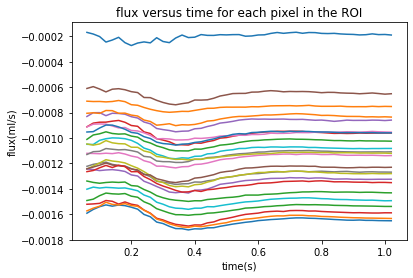

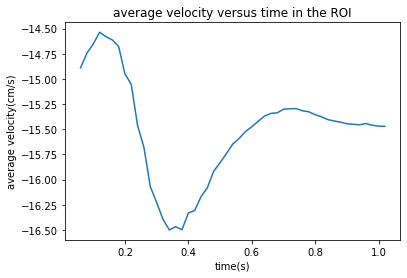

In [15]:
plotflux('simp')

In [16]:
print("Simpson's rule\n")
SSS_flux_time(maxind_simp)
SSS_flux(maxflux_simp)
SSS_velocity(maxflux_simp)

Simpson's rule



the maximum flow velocity for each pixel in the ROI occurs when t (in second) is  

       122nd  123rd  124th  125th  126th  127th
219th   0.18   0.30   0.36   0.36   0.32   0.32
220th   0.32   0.32   0.36   0.32   0.32   0.32
221st   0.36   0.36   0.36   0.32   0.32   0.32
222nd   0.36   0.36   0.36   0.36   0.36   0.34


the maximum flow rate (cm^3/s) for each pixel in the ROI is  

          122nd     123rd     124th     125th     126th     127th
219th -0.000273 -0.000798 -0.001102 -0.001055 -0.000951 -0.000739
220th -0.001015 -0.001365 -0.001384 -0.001163 -0.001056 -0.000903
221st -0.001498 -0.001692 -0.001432 -0.001350 -0.001235 -0.001192
222nd -0.001172 -0.001561 -0.001722 -0.001703 -0.001607 -0.001425


the maximum mean flow velocity (cm/s) for each pixel in the ROI is  

          122nd     123rd     124th     125th     126th     127th
219th -0.153948 -0.450057 -0.621458 -0.595311 -0.536567 -0.416768
220th -0.572883 -0.770162 -0.780738 -0.656230 -0.595584 -0.

Their tendency are similar but a little different while the latter one should be more precise due to its high-order correct.

### problem 3
reference1: https://www.dam.brown.edu/people/alcyew/handouts/numdiff.pdf  
reference2: http://www.engineering.uco.edu/~aaitmoussa/Courses/ENGR3703/Chapter6/ch6.pdf

$f(x+\Delta x)=f(x)+\Delta xf'(x)+\Delta x^2\frac{f''(x)}{2!}+\Delta x^3\frac{f'''(x)}{3!}+\Delta x^4\frac{f^{(4)}(x)}{4!}+...$  
$f(x-\Delta x)=f(x)-\Delta xf'(x)+\Delta x^2\frac{f''(x)}{2!}-\Delta x^3\frac{f'''(x)}{3!}+\Delta x^4\frac{f^{(4)}(x)}{4!}+...$  
$f(x+2\Delta x)=f(x)+2\Delta xf'(x)+4\Delta x^2\frac{f''(x)}{2!}+8\Delta x^3\frac{f'''(x)}{3!}+16\Delta x^4\frac{f^{(4)}(x)}{4!}+...$  
$f(x-2\Delta x)=f(x)-2\Delta xf'(x)+4\Delta x^2\frac{f''(x)}{2!}-8\Delta x^3\frac{f'''(x)}{3!}+16\Delta x^4\frac{f^{(4)}(x)}{4!}+...$  

In order to cancel out the $\Delta x^2 $and $\Delta x^3$ terms.
Firstly , take 8$\times$(first expansion − second expansion)  
<br>
$8\times\{f(x+\Delta x)-f(x-\Delta x)\}=16\Delta xf'(x)+16\Delta x^3\frac{f'''(x)}{3!}+16\Delta x^5\frac{f^{(5)}(x)}{5!}+...$  
And subtract the third expansion by the fourth expansion  
<br>
$f(x+2\Delta x)-f(x-2\Delta x)=4\Delta xf'(x)+16\Delta x^3\frac{f'''(x)}{3!}+64\Delta x^5\frac{f^{(5)}(x)}{5!}+...$  
Then  
<br>
$8\times\{f(x+\Delta x)-f(x-\Delta x)\}-\{f(x+2\Delta x)-f(x-2\Delta x)\}=12\Delta xf'(x)-48\Delta x^5\frac{f^{(5)}(x)}{5!}+...$  
Rearrange it  
<br>
$\frac{-f(x+2\Delta x)+8f(x+\Delta x)-8f(x-\Delta x)+f(x-2\Delta x)}{12\Delta x}-f'(x)=O(\Delta x^4)$  
<br>
A fourth-order centered difference approximation of $f'(x)$ is  
<br>
$f'(x_i)=\frac{-f(x_{i+2}\ )+8f(x_{i+1}\ )-8f(x_{i-1}\ )+f(x_{i-2}\ )}{12h}$

### problem 4

a. Forward finite-difference method:  
   $ f'(x)=\{−3f(x)+4f(x+\Delta x)−f(x+2\Delta x)\}/(2\Delta x)=(-3\times6.3+4\times7.3-8)/(2\times2)=0.575$
   $ f''(x)=\{2f(x)-5f(x+\Delta x)+4f(x+2\Delta x)-f(x+3\Delta)\}/(\Delta x^3)=(2\times6.3-5\times7.3+4\times8-8.4)/(2^3)=-0.0375$  
b. Centered fintie-difference method:  
   $ f'(x)=\{f(x+\Delta x)-f(x-\Delta x)\}/(2\Delta x)=(7.3-5.1)/(2\times2)=0.55 $  
   $ f''(x)=\{f(x+\Delta x)-2f(x)+f(x-\Delta x)\}/\Delta x^2=(7.3-2\times6.3+5.1)/2^2=-0.05 $

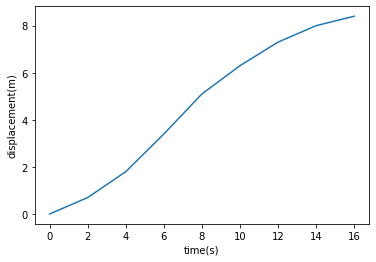

In [17]:
T_prime = np.array([0,2,4,6,8,10,12,14,16])
X = np.array([0,0.7,1.8,3.4,5.1,6.3,7.3,8.0,8.4])
plt.plot(T_prime,X)
plt.xlabel('time(s)')
plt.ylabel('displacement(m)')
plt.show()